In [1]:
!pip install --upgrade pip

  Using cached pip-22.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [3]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn import utils
import functools
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import naive_greedy_modularity_communities
import networkx.algorithms.community as nx_comm
G=nx.barabasi_albert_graph(4038, 22, seed=None, initial_graph=None)

In [4]:
def plot_graph(G,name):    
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)
    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of "+name)
    ax0.set_axis_off()

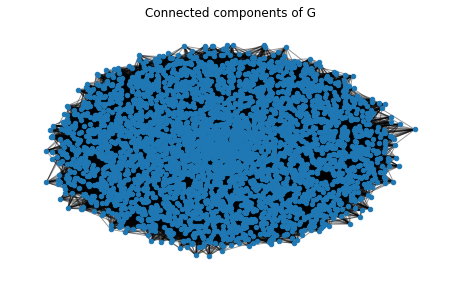

In [5]:
plot_graph(G,"G")

# Οπως φαίνεται οπτικά υπάρχουν 7 communities<br>
# Αρχικά θα βάλουμε τον αλγόριθμο greedy_modularity_communities.Γινεται ταξινόμηση του edge_betweeness και αφαιρούνται οι πρώτες k ακμές

In [6]:
def plot_communities(communities,colors,Graph,name):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)
    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    for i in range(len(communities)):
        nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20,nodelist=communities[i],node_color=colors[i])
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Communities"+name)
    ax0.set_axis_off()
    

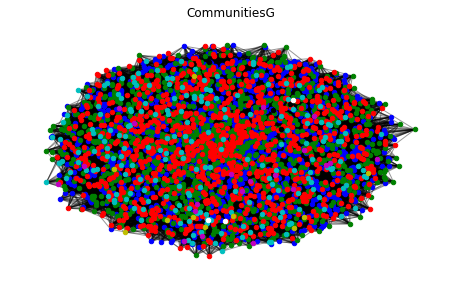

In [7]:
communities=greedy_modularity_communities(G,n_communities=7)
colors=["b","g","r","c","m","y","k","w"]
plot_communities(communities,colors,G,"G")

# Οπως φαίνεται σε έναν βαθμό φαίνονται τα communities και μάλιστα πολύ καλά

# Ας δκιμάσουμε και με luvain.
# Αρχικά κάθε κόμβος αποτελεί μια κοινότητα μονος του.Μετά κάθε κόμβο τον εισάγω στην κοινότητα με το μεγαλύτερο modularity

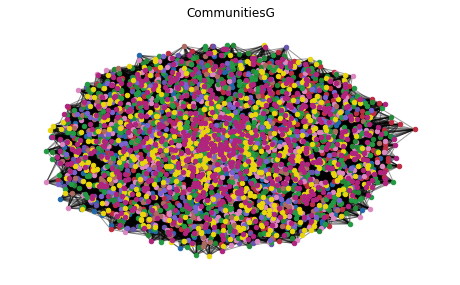

In [8]:
set_communities=nx_comm.louvain_communities(G)
communities=[]
for set_community in set_communities:
    communities.append(list(set_community))
colors=set()
while len(colors)<len(communities):
    colors.add('#%06X' % random.randint(0, 0xFFFFFF))
plot_communities(communities,list(colors),G,"G")

# Λαμβάνοντας υπόψιν τα 2 προηγούμενα community_outputs H louvain πετυχαίνει πολύ καλύτερο community detection στον συγκεκριμένο γράφο

# Ας ξαναεκτελέσουμε τον greedy αλγόριθμο με τον αριθμο των communities που βρήκαμε παραπάνω

In [9]:
length=len(communities)
%store length

Stored 'length' (int)


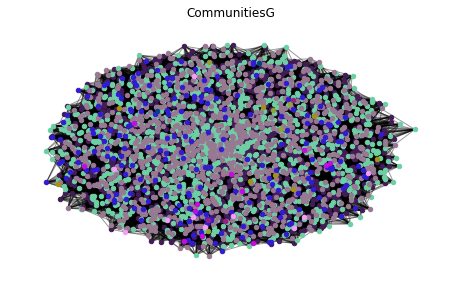

In [10]:
%store -r length
communities=greedy_modularity_communities(G,best_n=length,n_communities=length)
colors=set()
while len(colors)<len(communities):
    colors.add('#%06X' % random.randint(0, 0xFFFFFF))
plot_communities(communities,list(colors),G,"G")

# Συγκρίνοντας τα 3 παραπάνω καλύτερο community detection achieved by louvain